In [47]:
%reload_ext autoreload
%autoreload 2
sys.path.insert(0, '../../src/')
import pandas as pd
import sys
import data_loader
import re
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
seasons = data_loader.load_data(resolve = True)

<AxesSubplot:xlabel='EVENTMSGTYPE'>

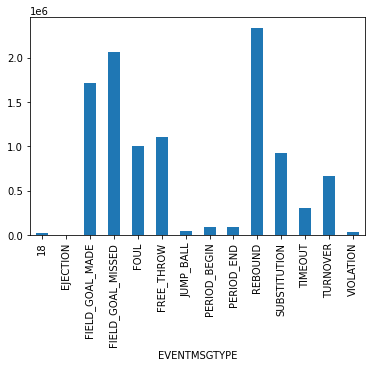

In [13]:
seasons.groupby("EVENTMSGTYPE").size().plot.bar(logy=False)

<AxesSubplot:xlabel='EVENTMSGACTIONTYPE'>

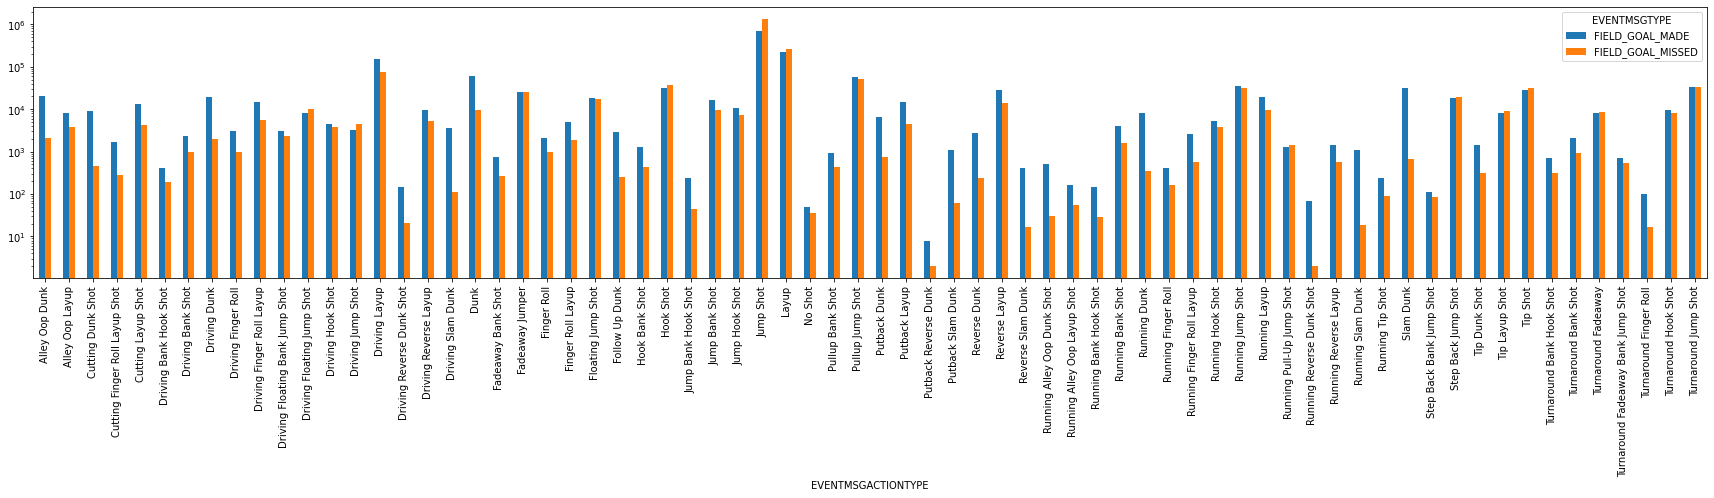

In [24]:
seasons[seasons["EVENTMSGTYPE"].isin(["FIELD_GOAL_MADE","FIELD_GOAL_MISSED"])].groupby(["EVENTMSGTYPE","EVENTMSGACTIONTYPE"]).size().unstack("EVENTMSGTYPE").plot.bar(logy = True, figsize=(30,5))

<AxesSubplot:xlabel='PERIOD'>

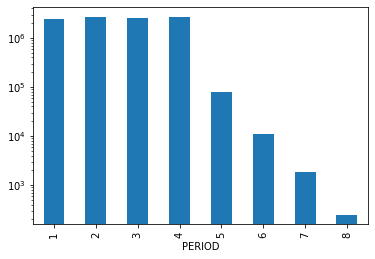

In [32]:
seasons.groupby("PERIOD").size().plot.bar(logy=True)

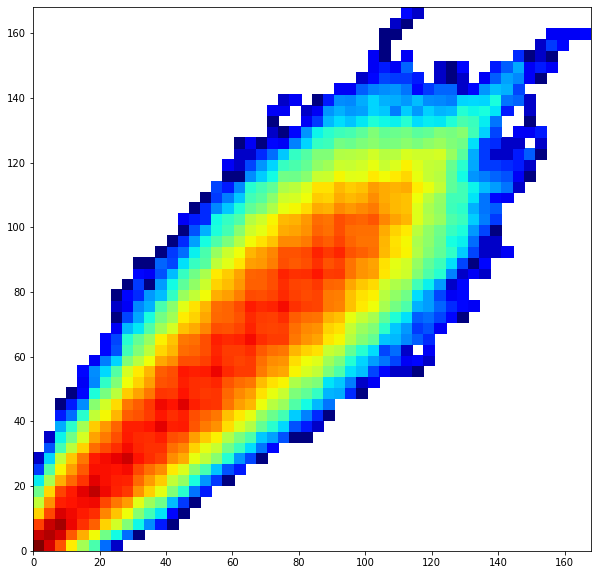

In [51]:
scores = seasons[~seasons["SCORE"].isna()]["SCORE"].str.split(" - ",expand=True)
plt.figure(figsize=(10, 10))
plt.hist2d(scores[0].astype(int), scores[1].astype(int), bins=(50, 50), cmap=plt.cm.jet, norm=mpl.colors.LogNorm())
plt.show()

<AxesSubplot:>

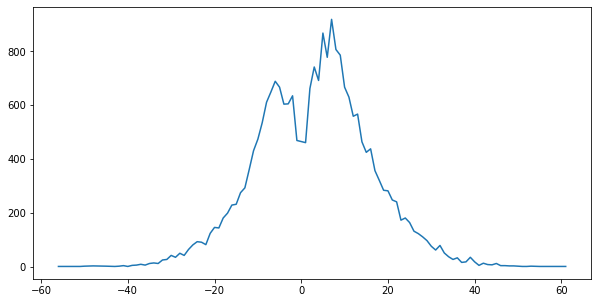

In [84]:
seasons[~seasons["SCOREMARGIN"].isna()].groupby("GAME_ID")["SCOREMARGIN"].last().astype(int).value_counts().sort_index().plot(figsize=(10,5))